# Clustering con K-Means

## Introducción


El problema de clustering consiste en encontrar una forma de agrupar datos por similaridad. 

Vamos arrancar con una pregunta: 

¿ Que diferencia hay con un problema de clasificación ?

¿ Se les ocurre algún problema de clasificación que podrian también hacerlo con clasificación  o por lo menos verlo desde esta perspectiva ?

### Métricas

Dado que el objetivo del clustering es encontrar grupos de datos similares entre sí, los resultados dependerán fuertemente de cómo midamos dicha similitud. Es decir, de la métrica que usemos para medir distancias en el espacio generado por nuestras features. 

Una métrica muy usada normalente es la métrica de Minkowski, en donde dado un parámetro $p$, la distancia entre dos puntos es

\begin{equation}
d_n(\vec{x_i},\vec{x_j})=\left( \sum_{k=1}^d \vert x_{ik}-x_{jk}\vert^{n}\right)^{\frac{1}{n}}
\end{equation}

en donde $\vec{x_i}$ es el dato i-ésimo representado como un vector de $d$ dimensiones (features). Cuando el parámetro es $n=2$ tenemos la distancia euclídea, que es la que se usa por defecto en la mayoría de los casos. Si $n=1$ define la distancia de Manhattan.


#### Silhouette score

El [score Silhouette](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)  mide cuán cercano es un punto al resto de los que están en su mismo cluster, en relación a cuán cercano es a los puntos del cluster más próximo. Es decir que para cada punto $i$, se tiene un coeficiente $s_i$

$$
s_i=\frac{b(i)-a(i)}{max\{a(i),b(i)\}}
$$

en donde $a(i)$ es la distancia promedio a todos los otros puntos dentro del mismo cluster y $b(i)$ es la distancia promedio a todos los puntos del cluster vecino más cercano. De esta manera

$$
-1\le s_i \le 1
$$

Si $s$ es cercano a 1, significa que el punto $i$ está correctamente etiquetado; $s$ cercano a cero indica que estaría igual de bien (o mal) etiquetarlo con el cluster vecino más cercano y $s$ cercano a -1 significa que el punto $i$ está mal etiquetado y pertenece al cluster vecino.

Para obtener un score del clustering podemos promediar los coeficientes:

$$
S(C)=\frac{1}{k}\sum_{j=1}^k \bar{s}_j
$$

en donde $\bar{s}_j$ es el coeficiente promedio de todos los puntos dentro del cluster j-ésimo.

#### Calinski-Harabasz score

Otra métrica para evaluar la calidad del clustering es el [score Calinski-Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index) que mide la relación entre la dispersión inter-clusters y la dispersión intra-clusters. Matemáticamente se define así:

$$
s(k)=\frac{Tr(B_k)}{Tr(W_k)}\frac{N-k}{k-1}
$$

en donde $Tr(B_k)$ y $Tr(W_k)$ son las trazas de las matrices de dispersión entre clusters $B_k$ e intra clusters $Tr(W_k)$.

Si tenemos una buena estructura de clusters con una buena definición daría una alta dispersión entre clusters diferentes y baja dispersión dentro de cada cluster. El factor $\frac{Tr(B_k)}{Tr(W_k)}$ tiende a aumentar con el número de clusters, puesto que al aumentar k estamos generando clusters más chicos y por ende menos dispersos. El segundo factor $\frac{N-k}{k-1}$ busca controlar este efecto: tiende a cero cuando k tiende a N. 

### Normalización

Ojo! Como los métodos de clustering dependen de una medida de distancia en el espacio de las features, es muy importante que las mismas se encuentren en la misma escala. Por lo que no tenemos que olvidarnos de normalizar los datos.


## K-means

K-means es uno de los algoritmos más famosos para la identificación de clusters, por su simplicidad y eficiencia. Como vimos en la teoría la idea es poder encontrar los mejores centroides para nuestro espacio de features.

#### Veamos un ejemplo tipico 

Trabajaremos con un dataset tomado de Kaggle [Shopping](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). Veamos que nos dice Kaggle de este dataset:

<b>Contexto</b>

Este conjunto de datos se ha creado únicamente para el aprendizaje de los conceptos de segmentación de clientes, también conocido como análisis de la cesta de la compra (carrito). 


<b>Contenido</b>

Usted es propietario de un supermercado y a través de las tarjetas de socio, tiene algunos datos básicos sobre sus clientes como la identificación del cliente, la edad, el género, los ingresos anuales y la puntuación de gasto.
La puntuación de gasto es algo que se asigna al cliente en función de los parámetros definidos, como el comportamiento del cliente y los datos de compra.

<b>Planteamiento del problema</b>

Usted es el propietario del centro comercial y quiere entender a los clientes que pueden ser fácilmente segmentados para que se puede dar al equipo de marketing y planificar la estrategia en consecuencia.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,silhouette_samples

In [2]:
df=pd.read_csv('mall_customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Renombremos las últimas dos columnas que tienen esos caracteres molestos.

In [6]:
df.rename({'Annual Income (k$)':'Inc','Spending Score (1-100)':'SS'},axis=1,inplace=True)
df.head(5)

,CustomerID,Gender,Age,Inc,SS
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


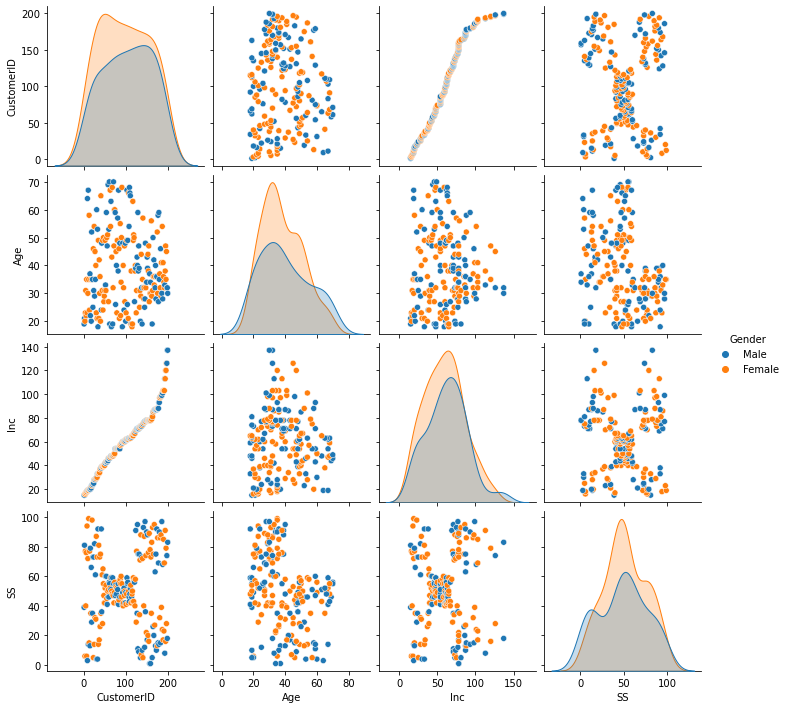

In [9]:
sns.pairplot(df,hue='Gender');

<b>¿ Qué se puede observar ?</b>

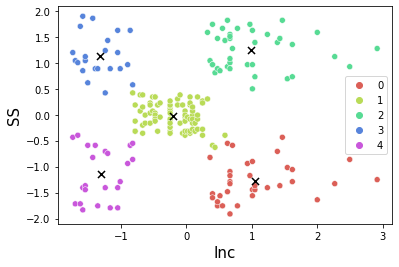

In [19]:
X=df[['Inc','SS']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=5,random_state=0) 
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas 
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 5));
plt.xlabel('Inc',fontsize=15);plt.ylabel('SS',fontsize=15);
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,color='k');


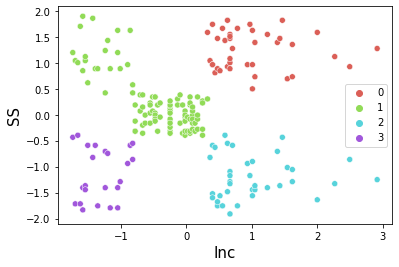

In [17]:
X=df[['Inc','SS']]

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X);

kmeans=KMeans(n_clusters=4,random_state=0) 
kmeans.fit(X_scaled)

labels = kmeans.labels_ # Etiquetas 
centroids = kmeans.cluster_centers_ # Coordenadas de los centroides

sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=labels,legend='full',palette=sns.color_palette("hls", 4));
plt.xlabel('Inc',fontsize=15);plt.ylabel('SS',fontsize=15);

### ¿ Cómo elegir k y como hacer una evaluación del modelo?

En algunos problemas uno conoce a priori el número de clusters que busca. Pero normalmente uno no sabe cual es ese número k.

En el ejemplo de los consumidores pudimos ver a ojo que  más o menos el número de clusters que buscábamos era 5. Esto fue posible al visualizar los datos en dos dimensiones, pero como vimos en clases anteriores esto casí nunca se puede hacer.

Veremos a continuación algunas estrategias para elegir el valor de k y evaluar el modelo de clustering.

En primer lugar podríamos usar como métrica la suma de las distancias cuadráticas de los puntos a sus centroides. Esto constituiría una medida de error, ya que uno desearía que los puntos estén cerca del centroide de su cluster.

<b>¿ Qué se espera que pase con esta métrica a medida que aumentamos k ?</b>

El atributo 'inertia_' del modelo kmeans tiene precisamente dicha suma de distancias cuadráticas a los centroides. Veamos cómo varía con k.


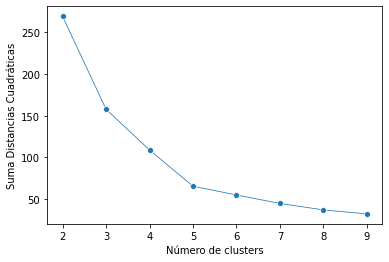

In [18]:
sq_distances=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=0) 
    kmeans.fit(X_scaled)
    sq_distances.append(kmeans.inertia_)

sns.lineplot(x=k_values,y=sq_distances,marker='o',size=30,legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');    

A medida que aumentamos el número de clusters, la suma de distancias cuadráticas se achica. Evidentemente, si k fuera igual a n, habría un centroide para cada punto y las distancias serían todas iguales a cero.

Un criterio para elegir el k es utilizar la regla heurística "del codo", en donde se elige el k a partir del cual la curva se empieza a aplanar. Es decir, a partir del cual la incorporación de un nuevo cluster no explica mucha más varianza de los datos. En este caso se ve que k=5 es una buena opción.



Grafiquemos el ahora el silhouette score en función de k en nuestro dataset:

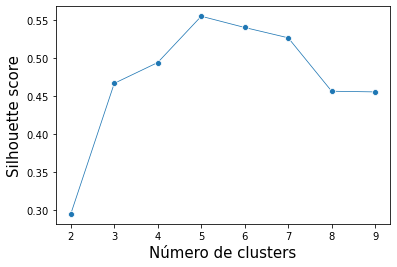

In [21]:
sil=[]
k_values=range(2,10);

for k in k_values:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=silhouette_score(X_scaled,kmeans.labels_)
    sil.append(score)

sns.lineplot(x=k_values,y=sil,marker='o',size=33,legend=False);
plt.ylabel('Silhouette score',fontsize=16);plt.xlabel('Número de clusters',fontsize=16);

Este plot nos muestra que el silhouette score promedio para cada valor de k, y nuevamente vemos que el valor óptimo es $k=5$. 


Veamos la métrica que nos queda la de Caliski Harabasz, dependiendo de los datos puede ser que tengamos un pico bien definido que nos permita elegir el k o puede ser que para valores razonable de k el score sea creciente pero podamos usar otro criterio como la "regla del codo" para ayudarnos.


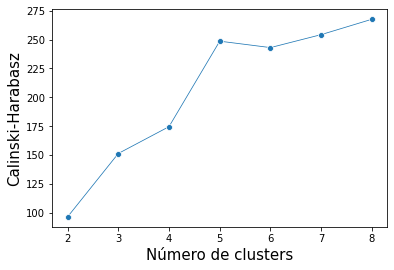

In [24]:
from sklearn.metrics import calinski_harabasz_score

k_values=range(2,9);
ch_scores=[]

for k in k_values:
    
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=0) # Numero de repeticiones=10
    kmeans.fit(X_scaled)
    score=calinski_harabasz_score(X_scaled,kmeans.labels_)
    ch_scores.append(score)

sns.lineplot(x=k_values,y=ch_scores,marker='o',size=30,legend=False);
plt.ylabel('Calinski-Harabasz',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);


# Ejercitación: 

## Probar utilizar el dataset anterior para hacer lo mismo con Pycaret

## K-modes (variables son categóricas)

K-means tiene sentido cuando las variables son continuas. Si tuvieramos alguna variable categórica podríamos incluirla en el análisis creando las variables dummy correspondientes y estandarizándolas. Pero si todos los datos fueran categóricos tendriamos que modificar el agoritmo.

K-modes es una modificación muy intuitiva, en donde los centroides están definidos por las modas (valor más frecuente) de cada feature, medidas sobre los puntos que forman cada cluster. La distancia entre dos puntos, en lugar de ser la euclídea, se define como el número de features en los cuales no coinciden los valores.

Pueden ver un ejemplo acá : 

https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering



